## Data Loading

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")



# Load the dataset
# Assuming the dataset is in a CSV file named 'Africa_conflict_dataset.csv'
data = pd.read_csv('Africa_conflict_dataset\Africa_conflict_dataset.csv')

# Display the first few rows of the dataset
data.head()

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,source,source_scale,fatalities
0,MLI33921,2/28/2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,Military Forces of Mali (2021-),Wagner Group,State forces,State forces-Rebel group,Western Africa,Mali,Al Zallaqa,New media,0
1,BFO13376,2/28/2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,VDP: Volunteer for Defense of Homeland,NaN,Identity militia,Rebel group-Identity militia,Western Africa,Burkina Faso,Undisclosed Source,Local partner-Other,0
2,MLI33922,2/28/2025,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),Wagner Group,State forces,Civilians (Mali),NaN,Civilians,State forces-Civilians,Western Africa,Mali,Twitter,New media,0
3,GHA2795,2/28/2025,1,Political violence,Violence against civilians,Attack,Land Guards,NaN,External/Other forces,Civilians (Ghana),Farmers (Ghana),Civilians,External/Other forces-Civilians,Western Africa,Ghana,3 News,National,0
4,GHA2800,2/28/2025,1,Political violence,Riots,Mob violence,Rioters (Ghana),NaN,Rioters,Civilians (Ghana),Labor Group (Ghana),Civilians,Rioters-Civilians,Western Africa,Ghana,Ghana Web,National,0


## Data Exploration

In [18]:
# Check the shape of the dataset
print("Shape of the Dataset:", data.shape)

# Check on the summary of thr dataset
print("\nInfo:")
data.info()

# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
display(data.describe())

Shape of the Dataset: (413947, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_id_cnty   413947 non-null  object
 1   event_date      413947 non-null  object
 2   time_precision  413947 non-null  int64 
 3   disorder_type   413947 non-null  object
 4   event_type      413947 non-null  object
 5   sub_event_type  413947 non-null  object
 6   actor1          413947 non-null  object
 7   assoc_actor_1   114747 non-null  object
 8   inter1          413947 non-null  object
 9   actor2          301956 non-null  object
 10  assoc_actor_2   85527 non-null   object
 11  inter2          301956 non-null  object
 12  interaction     413947 non-null  object
 13  region          413947 non-null  object
 14  country         413947 non-null  object
 15  source          413947 non-null  object
 16  source_scale    413947 non-null 

,time_precision,fatalities
count,413947.000000,413947.000000
mean,1.130737,2.439153
std,0.393477,24.320917
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1350.000000


In [19]:
# Value counts for Categorical columns eg. 'region', 'country', 'event_type', 'disorder_type'
print("\nValue counts for 'region':")
display(data['region'].value_counts())

print("\nValue counts for 'country':")
display(data['country'].value_counts())

print("\nValue counts for 'event_type':")
display(data['event_type'].value_counts())

print("\nValue counts for 'disorder_type':")
display(data['disorder_type'].value_counts())


Value counts for 'region':


region
Eastern Africa     129294
Northern Africa     93960
Western Africa      92353
Middle Africa       65031
Southern Africa     33309
Name: count, dtype: int64


Value counts for 'country':


country
Somalia                                         48651
Nigeria                                         40480
Democratic Republic of Congo                    33961
Sudan                                           33287
South Africa                                    22662
Kenya                                           16693
Cameroon                                        16248
Ethiopia                                        14599
South Sudan                                     14422
Morocco                                         13059
Algeria                                         12712
Mali                                            12302
Burkina Faso                                    12079
Libya                                           11898
Egypt                                           11801
Tunisia                                         11203
Burundi                                         10868
Uganda                                           9183
Central African Repu


Value counts for 'event_type':


event_type
Battles                       105556
Violence against civilians    100372
Protests                       94993
Riots                          42737
Strategic developments         38984
Explosions/Remote violence     31305
Name: count, dtype: int64


Value counts for 'disorder_type':


disorder_type
Political violence                    256514
Demonstrations                        115877
Strategic developments                 38984
Political violence; Demonstrations      2572
Name: count, dtype: int64

## Data Cleaning

In [20]:
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
event_id_cnty          0
event_date             0
time_precision         0
disorder_type          0
event_type             0
sub_event_type         0
actor1                 0
assoc_actor_1     299200
inter1                 0
actor2            111991
assoc_actor_2     328420
inter2            111991
interaction            0
region                 0
country                0
source                 0
source_scale           0
fatalities             0
dtype: int64


In [21]:
# Handle missing values
# Fill missing values in 'assoc_actor_1', 'assoc_actor_2', 'actor2' and 'inter2' column with the 'Unknown' value
for col in['assoc_actor_1', 'assoc_actor_2', 'actor2', 'inter2']:
    data[col].fillna('Unknown')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [22]:
data.head(15)

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,source,source_scale,fatalities
0,MLI33921,2/28/2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,Military Forces of Mali (2021-),Wagner Group,State forces,State forces-Rebel group,Western Africa,Mali,Al Zallaqa,New media,0
1,BFO13376,2/28/2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,VDP: Volunteer for Defense of Homeland,NaN,Identity militia,Rebel group-Identity militia,Western Africa,Burkina Faso,Undisclosed Source,Local partner-Other,0
2,MLI33922,2/28/2025,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),Wagner Group,State forces,Civilians (Mali),NaN,Civilians,State forces-Civilians,Western Africa,Mali,Twitter,New media,0
3,GHA2795,2/28/2025,1,Political violence,Violence against civilians,Attack,Land Guards,NaN,External/Other forces,Civilians (Ghana),Farmers (Ghana),Civilians,External/Other forces-Civilians,Western Africa,Ghana,3 News,National,0
4,GHA2800,2/28/2025,1,Political violence,Riots,Mob violence,Rioters (Ghana),NaN,Rioters,Civilians (Ghana),Labor Group (Ghana),Civilians,Rioters-Civilians,Western Africa,Ghana,Ghana Web,National,0
5,GHA2803,2/28/2025,1,Political violence,Violence against civilians,Attack,Unidentified Communal Militia (Ghana),NaN,Identity militia,Civilians (Ghana),NaN,Civilians,Identity militia-Civilians,Western Africa,Ghana,My Joy Online,National,3
6,MOR13384,2/28/2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Morocco),Al Adl Wa Al Ihssane; Labor Group (Morocco); L...,Protesters,NaN,NaN,NaN,Protesters only,Northern Africa,Morocco,Al Jamaa,National,0
7,DRC35011,2/28/2025,1,Strategic developments,Strategic developments,Other,M23: March 23 Movement,NaN,Rebel group,NaN,NaN,NaN,Rebel group only,Middle Africa,Democratic Republic of Congo,Twitter,New media,0
8,DRC35012,2/28/2025,1,Political violence,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel group,EPLC: Awakening of Patriots for the Liberation...,NaN,Political militia,Rebel group-Political militia,Middle Africa,Democratic Republic of Congo,Twitter,New media,10
9,KEN17168,2/28/2025,1,Demonstrations,Protests,Peaceful protest,Protesters (International),Refugees/IDPs (International),Protesters,NaN,NaN,NaN,Protesters only,Eastern Africa,Kenya,Daily Nation (Kenya),National,0


## Data Preparation

In [23]:
# Addressing inconsistent data entries
# Convert 'event_date' column to datetime format, coercing errors
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

# split the 'event_date' column into 'year', 'month' and 'day' columns
data['year'] = data['event_date'].dt.year
data['month'] = data['event_date'].dt.month
data['day'] = data['event_date'].dt.day

# Drop the 'event_date' column
#data.drop('event_date', axis=1, inplace=True)

## Data Analysis

In [24]:
# Descriptive Statistics of the dataset
print("\nDescriptive Statistics for Fatalities:")
print(data['fatalities'].describe())
print(data.groupby('region')['fatalities'].describe())
print(data.groupby('country')['fatalities'].describe())
print(data.groupby('year')['fatalities'].describe())


Descriptive Statistics for Fatalities:
count    413947.000000
mean          2.439153
std          24.320917
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1350.000000
Name: fatalities, dtype: float64
                    count      mean        std  min  25%  50%  75%     max
region                                                                    
Eastern Africa   129294.0  2.638405  24.691083  0.0  0.0  0.0  1.0  1172.0
Middle Africa     65031.0  4.248835  45.610694  0.0  0.0  0.0  1.0  1350.0
Northern Africa   93960.0  1.941997  14.342348  0.0  0.0  0.0  0.0  1000.0
Southern Africa   33309.0  0.151401   0.733235  0.0  0.0  0.0  0.0    34.0
Western Africa    92353.0  2.216831  10.903076  0.0  0.0  0.0  1.0  1000.0
                                                count        mean         std  \
country                                                                         
Algeria                                       12712.0   

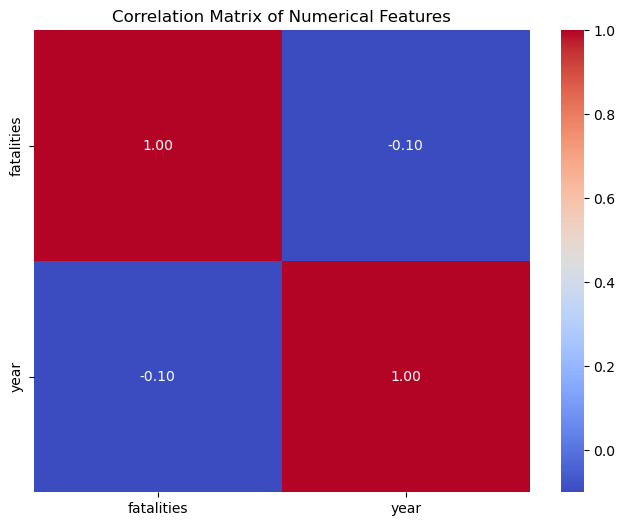

In [25]:
# Correlation Analysis of Numerical Columns
numerical_columns = ['fatalities', 'year']
correlation = data[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Visualisation

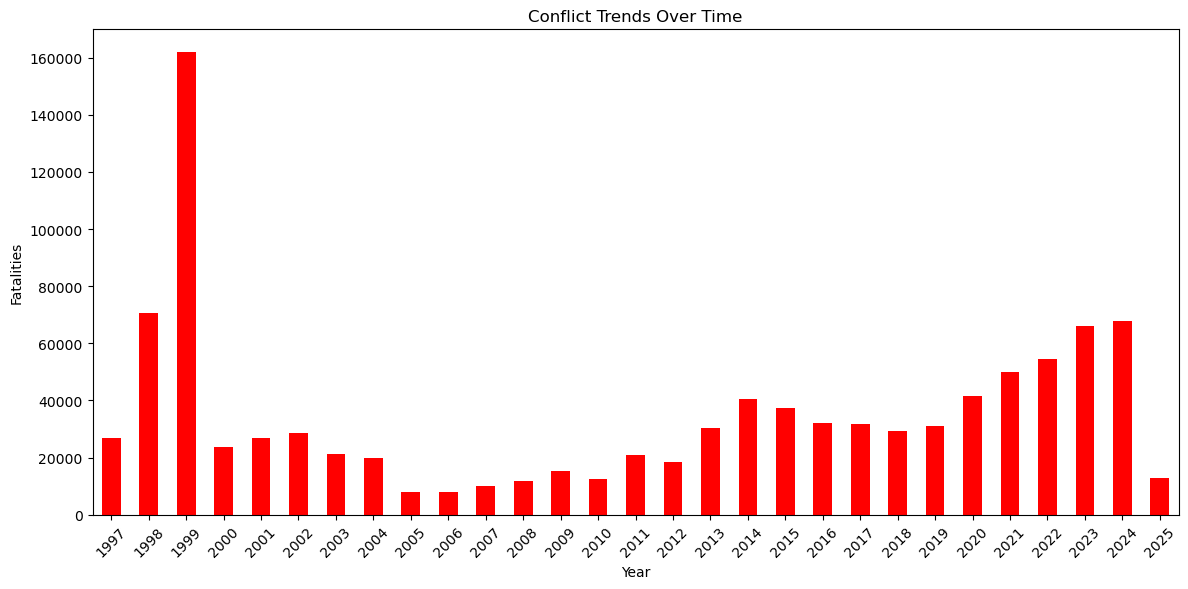

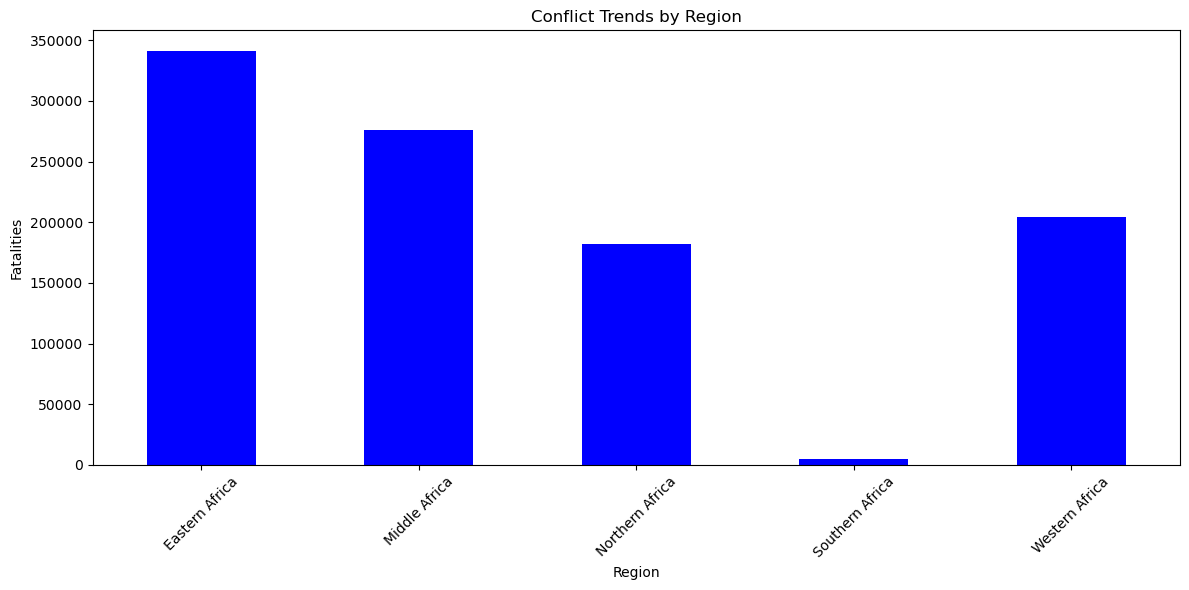

In [26]:
# Conflict trends over time
conflict_trends = data.groupby('year')['fatalities'].sum()
plt.figure(figsize=(12, 6))
conflict_trends.plot(kind='bar', color='r')
plt.title('Conflict Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conflict trends by region
region_trends = data.groupby('region')['fatalities'].sum()
plt.figure(figsize=(12, 6))
region_trends.plot(kind='bar', color='b')
plt.title('Conflict Trends by Region')
plt.xlabel('Region')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

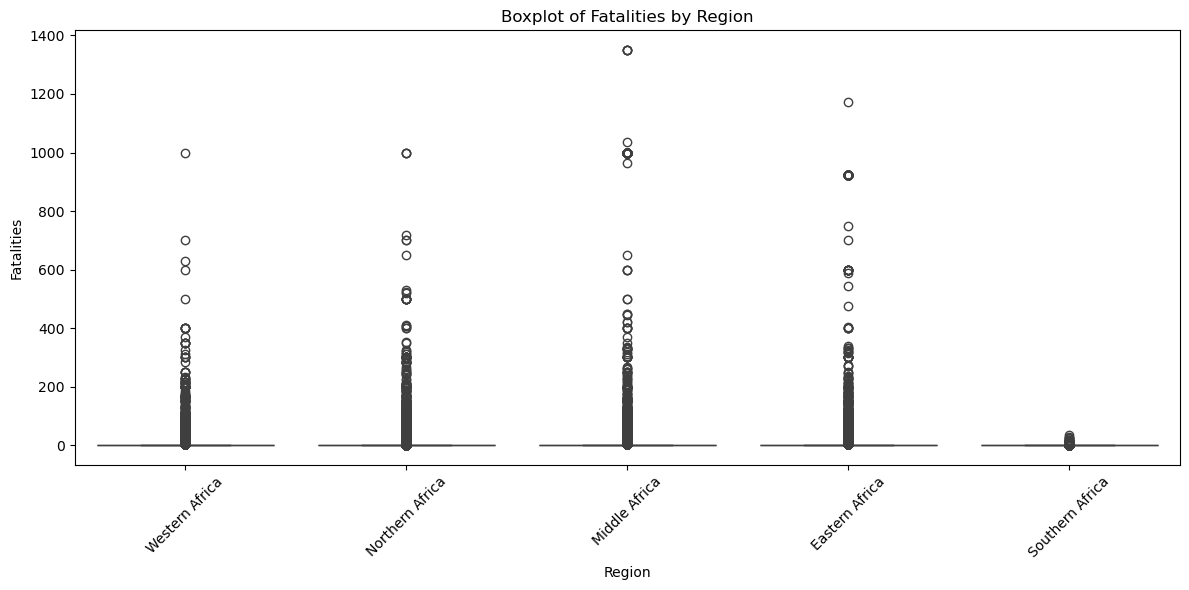

In [27]:
# Boxplot of fatalities by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='fatalities', data=data)
plt.title('Boxplot of Fatalities by Region')
plt.xlabel('Region')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

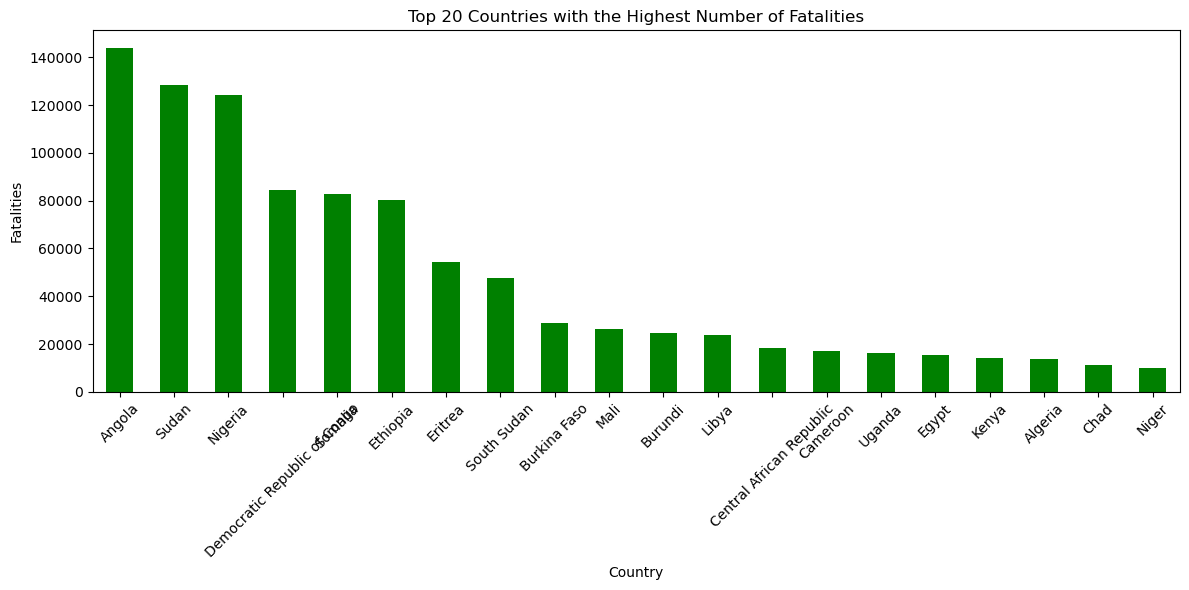

In [28]:
# Top 20 countries with the highest number of fatalities
top_countries = data.groupby('country')['fatalities'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='g')
plt.title('Top 20 Countries with the Highest Number of Fatalities')
plt.xlabel('Country')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

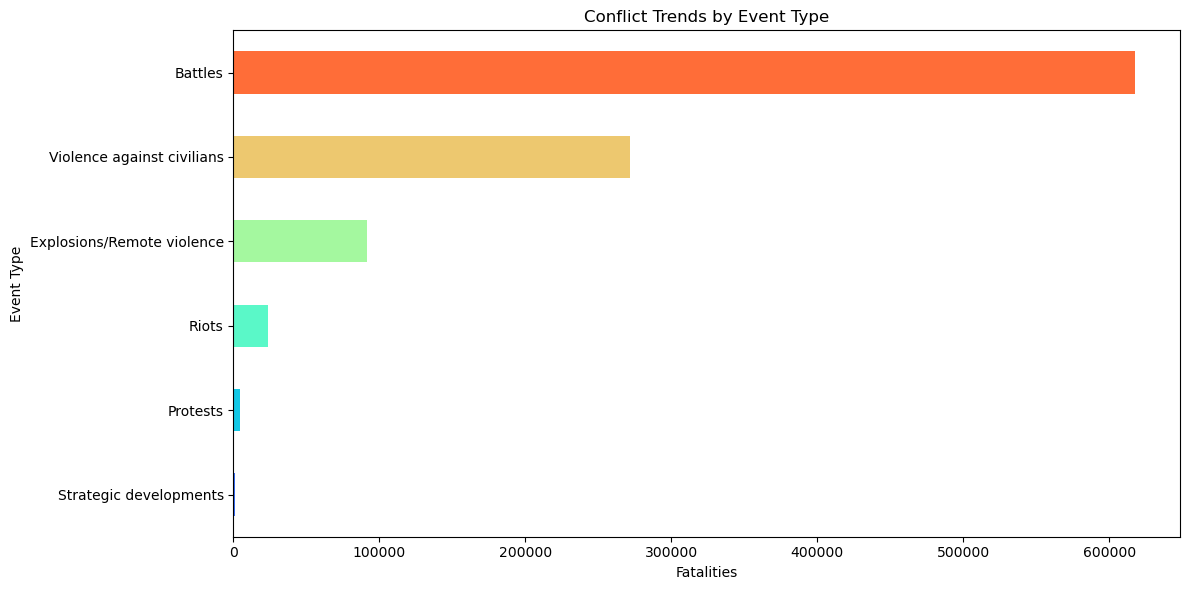

In [29]:
# Group data by event type and sum fatalities
event_trends = data.groupby('event_type')['fatalities'].sum()

colors = sns.color_palette("rainbow", len(event_trends))

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
event_trends.sort_values().plot(kind='barh', color=colors)
plt.title('Conflict Trends by Event Type')
plt.xlabel('Fatalities')
plt.ylabel('Event Type')
plt.tight_layout()
plt.show()

## Univariate Analysis

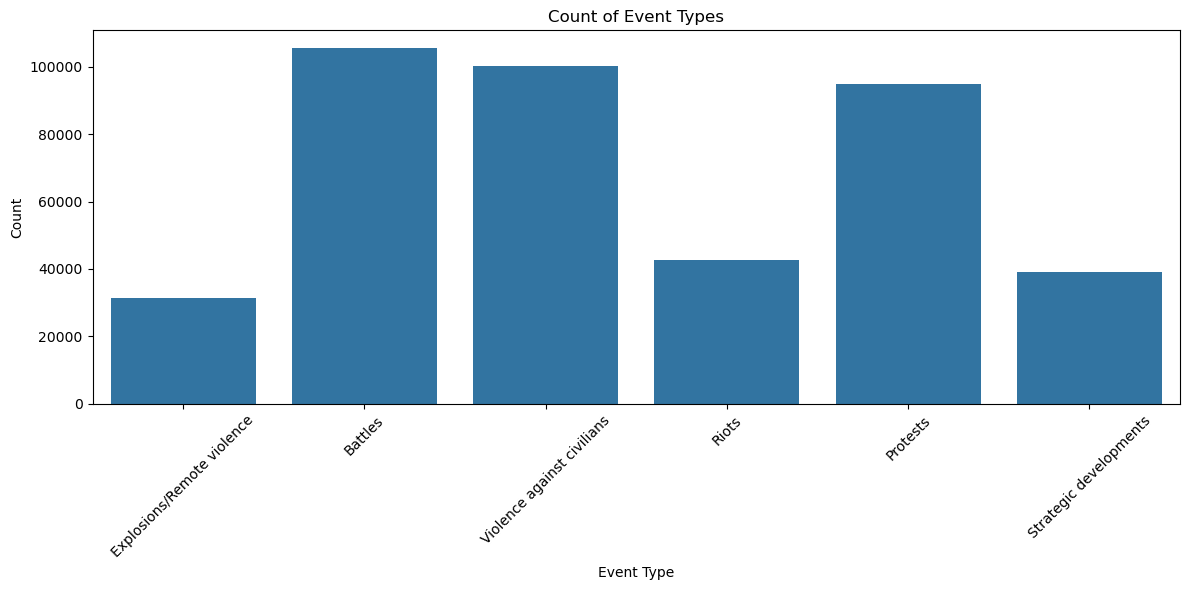

In [30]:
# Univariate Analysis of Categorical Columns
# Plot the count of event types
plt.figure(figsize=(12, 6))
sns.countplot(x='event_type', data=data)
plt.title('Count of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

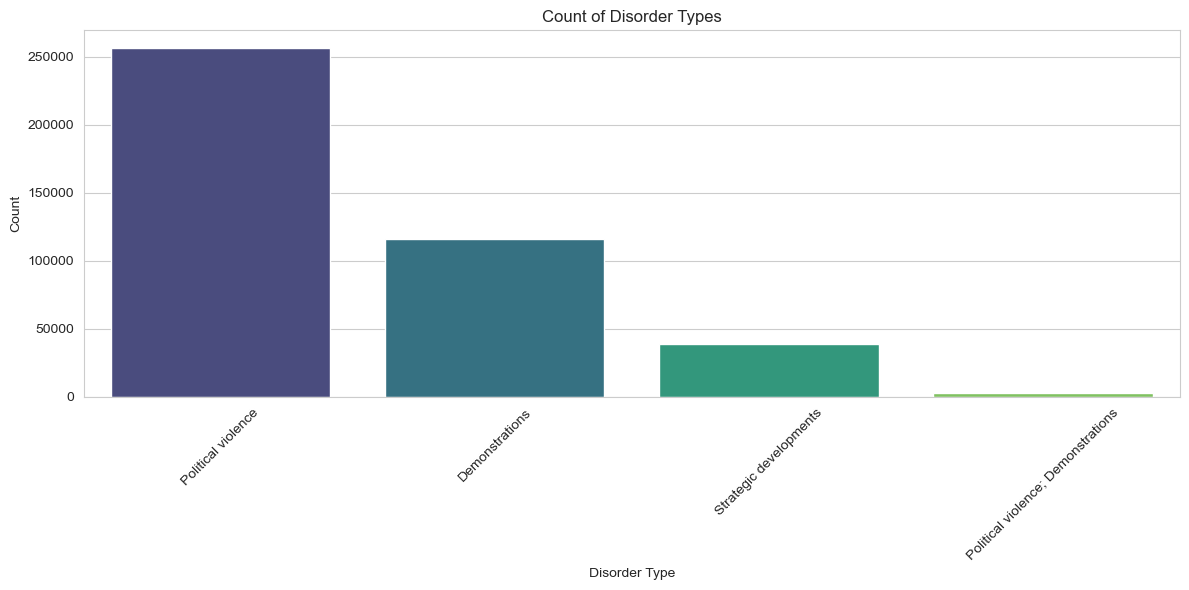

In [ ]:
# Ploting the count of disorder types
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='disorder_type', data=data, palette='viridis')
plt.title('Count of Disorder Types')
plt.xlabel('Disorder Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

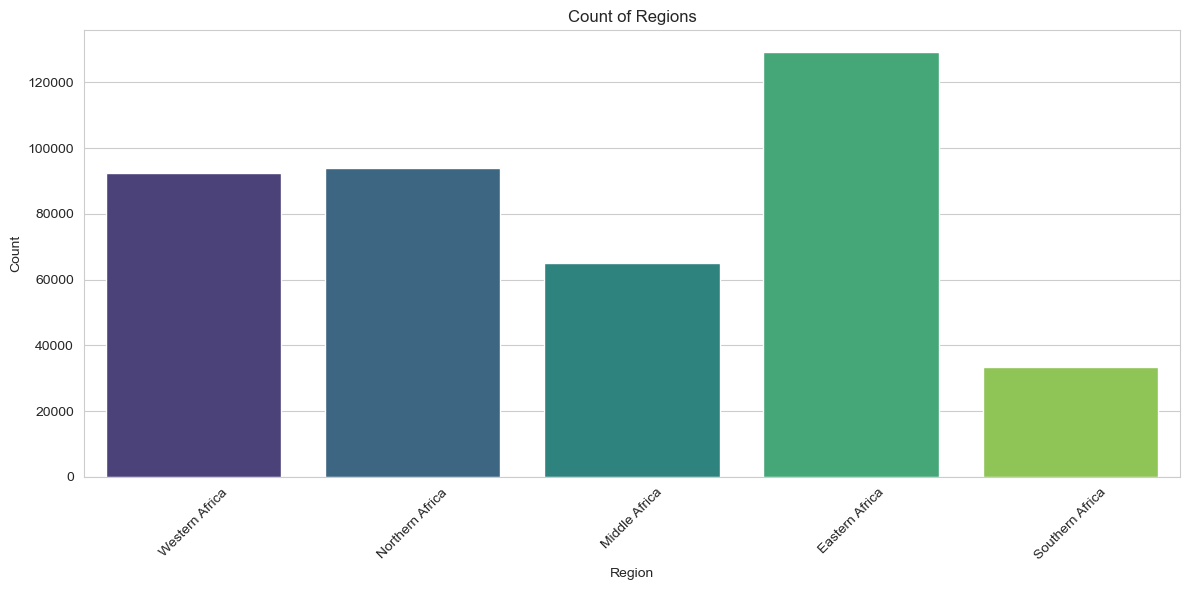

In [ ]:
# Ploting the count of regions
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=data, palette='viridis')
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis

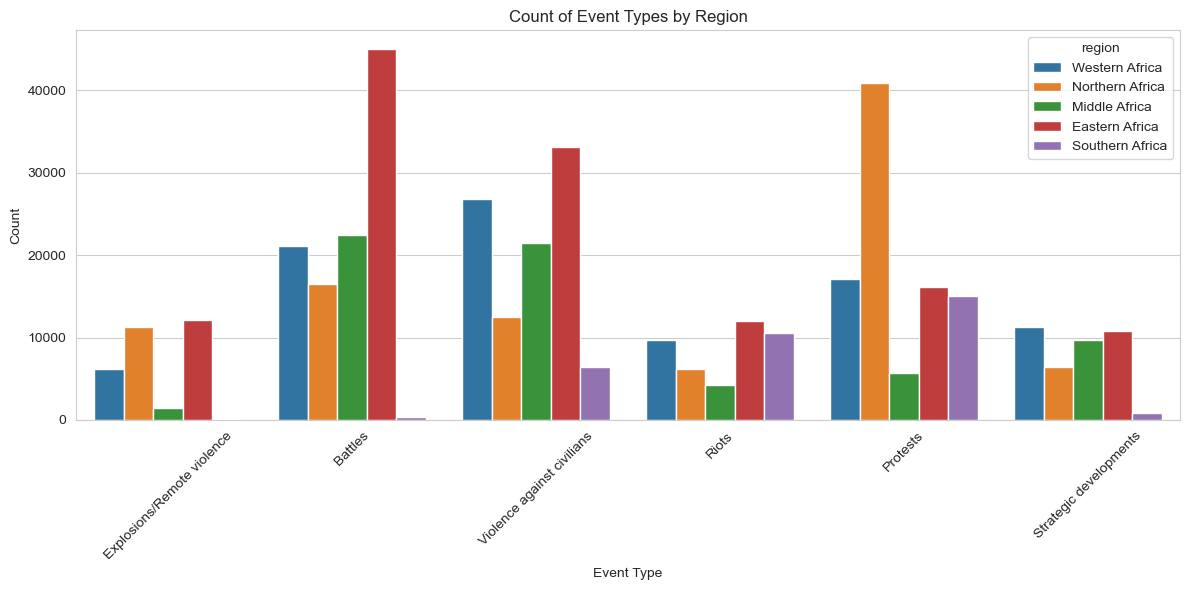

In [ ]:
# Bivariate Analysis of Categorical Columns
# Ploting the count of event types by region
plt.figure(figsize=(12, 6))
sns.countplot(x='event_type', hue='region', data=data)
plt.title('Count of Event Types by Region')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

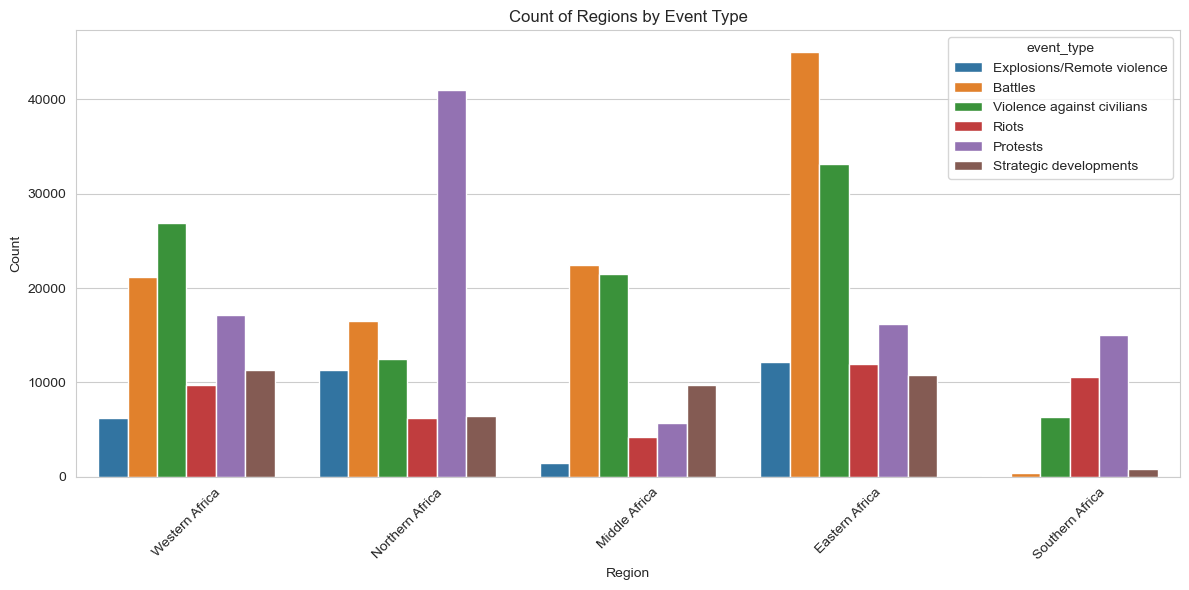

In [ ]:
# Ploting the count of regions
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='event_type', data=data)
plt.title('Count of Regions by Event Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

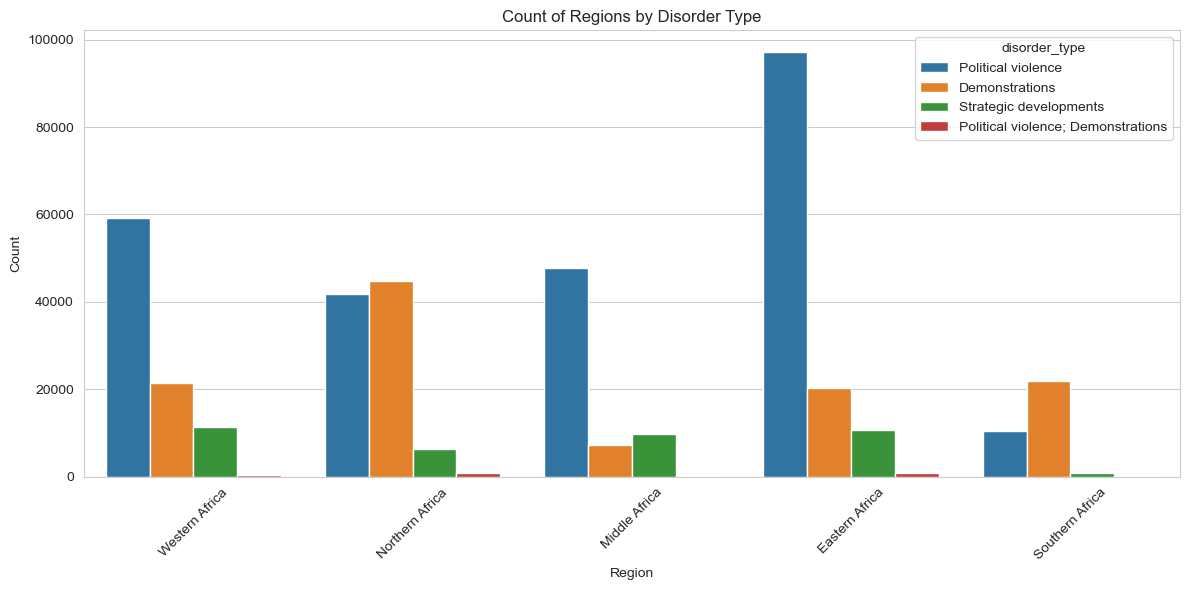

In [ ]:
# Ploting the count of regions by disorder type
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='disorder_type', data=data)
plt.title('Count of Regions by Disorder Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()